In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the data
data = pd.read_csv('/Users/yeshwanthsatyadev/Downloads/Company_Data (1).csv')  
# Explore the data
print(data.head())
print(data.info())
print(data.describe())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   

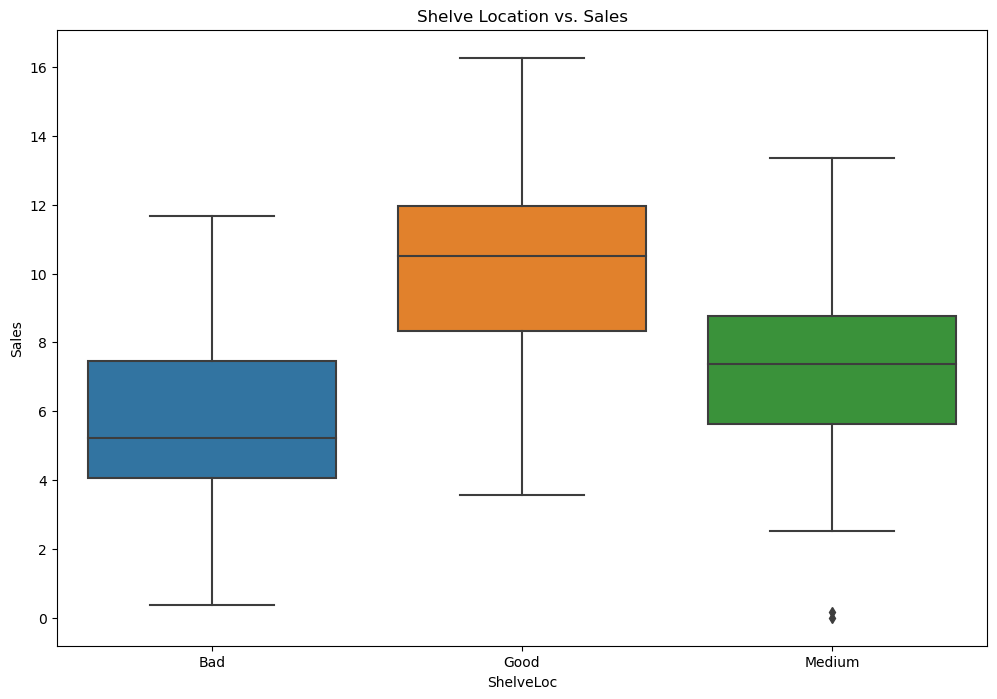

In [3]:
# Visualize the relationship between categorical variables and the target variable (Sales)
plt.figure(figsize=(12, 8))
sns.boxplot(x='ShelveLoc', y='Sales', data=data)
plt.title('Shelve Location vs. Sales')
plt.show()

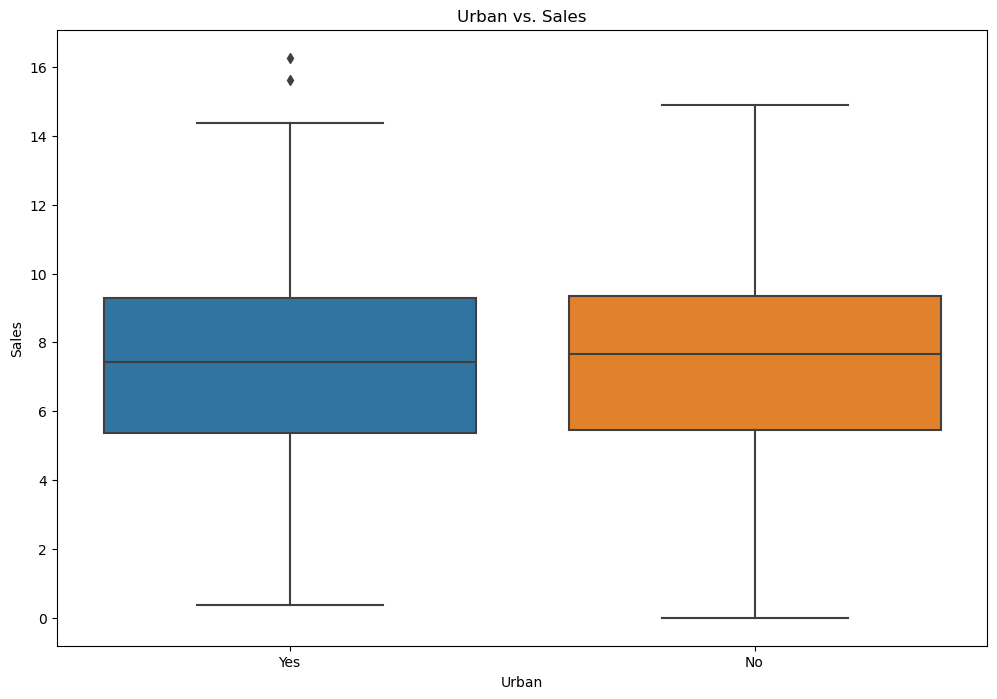

In [4]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Urban', y='Sales', data=data)
plt.title('Urban vs. Sales')
plt.show()


In [5]:
# Convert 'Sales' to a categorical variable
data['SalesCategory'] = pd.cut(data['Sales'], bins=[-float('inf'), 8, float('inf')], labels=['Low', 'High'])

In [6]:
# Prepare the data for modeling
X = data.drop(['Sales', 'SalesCategory'], axis=1)
y = data['SalesCategory']
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [7]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [9]:
# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.76      0.68      0.71        37
         Low       0.74      0.81      0.78        43

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.75        80
weighted avg       0.75      0.75      0.75        80

[[25 12]
 [ 8 35]]


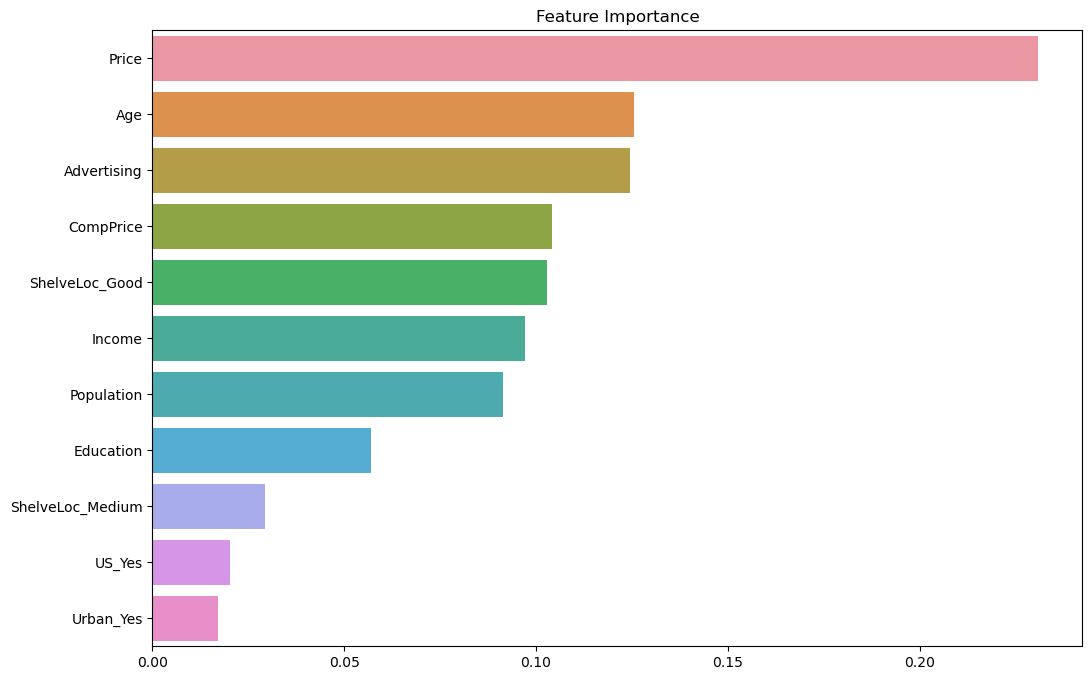

In [10]:
# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
feature_importance.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()